# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [ ]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

Let's generate our dataset and take a look on it.

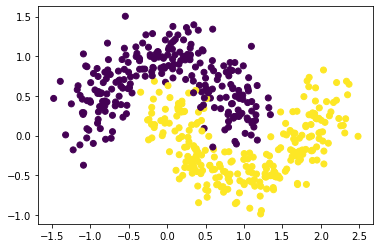

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
def plot_decisions(estimator, est_name, X, y):
    fig = plt.figure(figsize=(10, 8))
    estimator.fit(X, y)
    fig = plot_decision_regions(X=X, y=y, clf=estimator, legend=2)
    plt.title(est_name)
    plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.33)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions


### YOUR CODE HERE

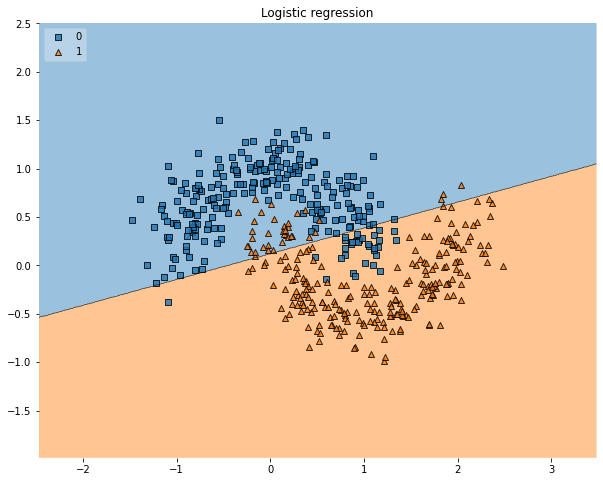

accuracy = 0.8606060606060606


In [6]:
lr = LogisticRegression(C = 1000000, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500) # add some params
plot_decisions(lr, 'Logistic regression', moons_points, moons_labels)
lr_predictions = lr.predict(X_test)
labels = list(tuple(y_train))
print('accuracy =', metrics.accuracy_score(y_test, lr_predictions))

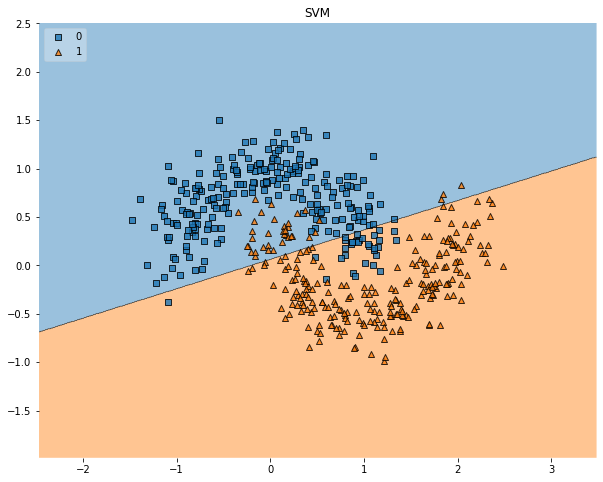

accuracy = 0.8666666666666667


In [7]:
svm = SVC(kernel='linear', C = 100) # here too
plot_decisions(svm, 'SVM', moons_points, moons_labels)
svm_predictions = svm.predict(X_test)
labels = list(tuple(y_train))
print('accuracy =', metrics.accuracy_score(y_test, svm_predictions))

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality? 
#### Classification quality have been higher(except sigmoid, but I can't find more optimal params).

* How did decision border changed for each kernel? 
#### Borders are non-linear now, so descision borders have changed. 

* What `degree` have you chosen and why? 
#### I've chose params by hand. If degree was higher – model are overteached, less – we lose quality.

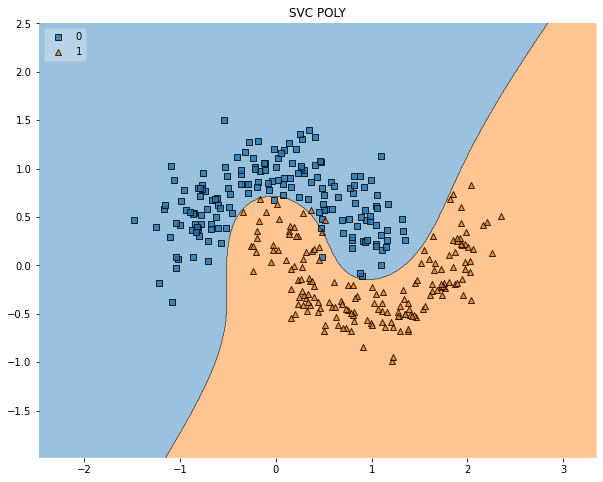

accuracy = 0.9757575757575757


In [8]:
svc_poly = SVC(kernel='poly', C=100, degree=4, coef0=0.7, gamma=0.5)
plot_decisions(svc_poly, 'SVC POLY', X_train, y_train)
svc_poly_predictions = svc_poly.predict(X_test)
labels = list(tuple(y_train))
print('accuracy =', metrics.accuracy_score(y_test, svc_poly_predictions))

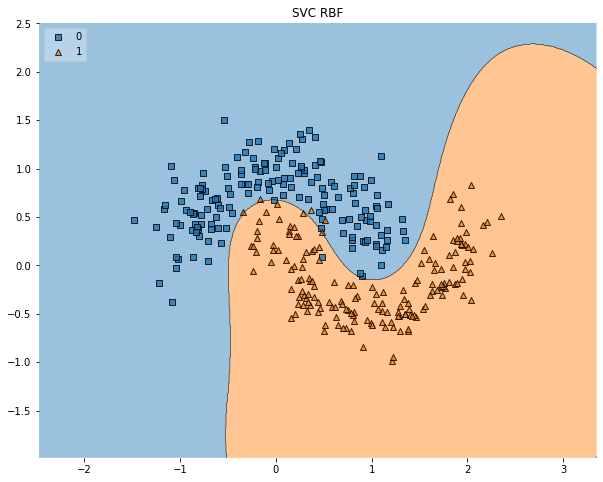

accuracy = 0.9818181818181818


In [9]:
svc_rbf = SVC(kernel='rbf', C=100, gamma='auto')
plot_decisions(svc_rbf, 'SVC RBF', X_train, y_train)
svc_rbf_predictions = svc_rbf.predict(X_test)
labels = list(tuple(y_train))
print('accuracy =', metrics.accuracy_score(y_test, svc_rbf_predictions))

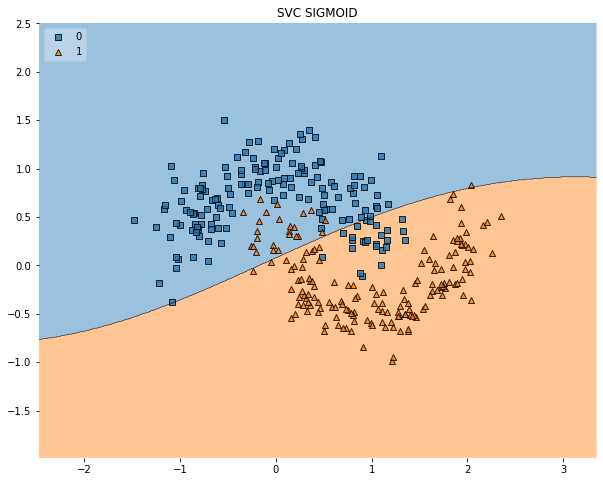

accuracy = 0.8545454545454545


In [10]:
svc_sigmoid = SVC(kernel='sigmoid', C=1, coef0=0.1, gamma=0.1 )
plot_decisions(svc_sigmoid, 'SVC SIGMOID', X_train, y_train)
svc_sigmoid_predictions = svc_sigmoid.predict(X_test)
labels = list(tuple(y_train))
print('accuracy =', metrics.accuracy_score(y_test, svc_sigmoid_predictions))

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
#### Quality is better now, border type are flatter at the edges.
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.
#### We use degree=3 there, but in poly SVM we use degree=4

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.33)

polynomial_svm_clf = Pipeline([
("poly_features", PolynomialFeatures(degree=3)),
("svm_clf", SVC(C=1, kernel='linear'))
])

polynomial_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('svm_clf', SVC(C=1, kernel='linear'))])

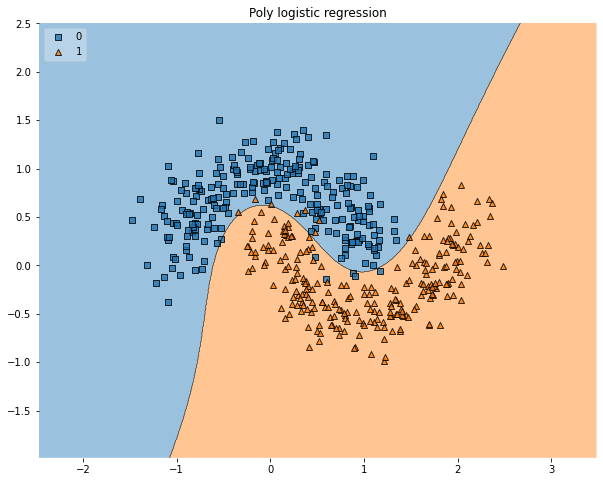

accuracy = 0.9696969696969697


In [12]:
plot_decisions(polynomial_svm_clf, 'Poly logistic regression', moons_points, moons_labels)
polynomial_svm_clf_predictions = polynomial_svm_clf.predict(X_test)
labels = list(tuple(y_train))
print('accuracy =', metrics.accuracy_score(y_test, polynomial_svm_clf_predictions))

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

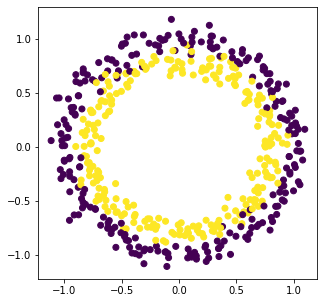

In [13]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

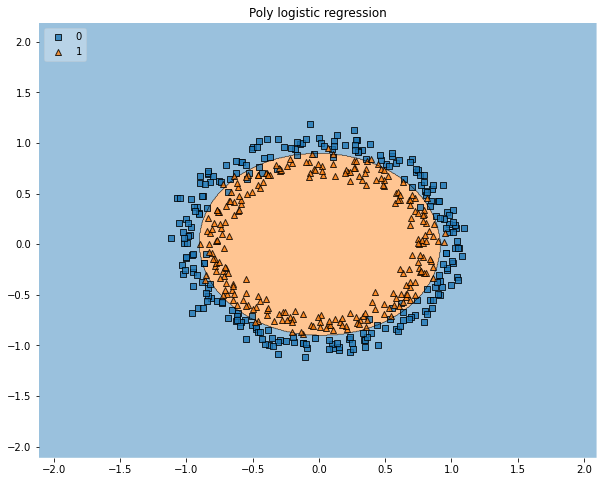

accuracy = 0.9272727272727272


In [14]:
X_train, X_test, y_train, y_test = train_test_split(circles_points, circles_labels, test_size=0.33)

polynomial_svm_clf = Pipeline([
("poly_features", PolynomialFeatures(degree=2)),
("svm_clf", SVC(C=1, kernel='linear'))
])
polynomial_svm_clf.fit(X_train, y_train)
plot_decisions(polynomial_svm_clf, 'Poly logistic regression', circles_points, circles_labels)
polynomial_svm_clf_predictions = polynomial_svm_clf.predict(X_test)
labels = list(tuple(y_train))
print('accuracy =', metrics.accuracy_score(y_test, polynomial_svm_clf_predictions))

And even more:

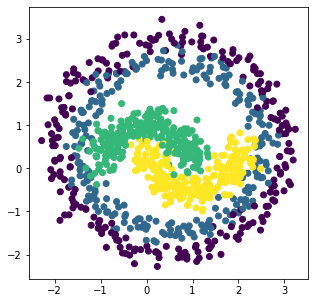

In [15]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

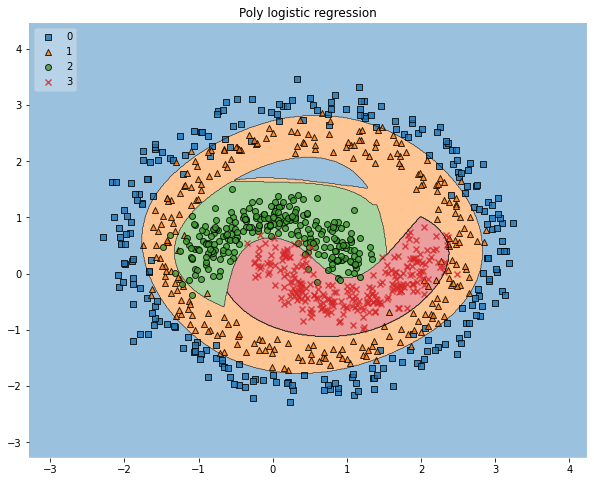

accuracy = 0.935


In [16]:
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.2)

polynomial_svm_clf = Pipeline([
("poly_features", PolynomialFeatures(degree=4)),
("svm_clf", SVC(C=1, kernel='linear'))
])
polynomial_svm_clf.fit(X_train, y_train)
plot_decisions(polynomial_svm_clf, 'Poly logistic regression', points, labels)
polynomial_svm_clf_predictions = polynomial_svm_clf.predict(X_test)
labels = list(tuple(y_train))
print('accuracy =', metrics.accuracy_score(y_test, polynomial_svm_clf_predictions))

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

### In conclusion I'd like to tell that `PolynomialFeatures` really shows great results for moons and circles